In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np



data = np.loadtxt('train_2d_reg_data.csv', delimiter=',', skiprows=1, unpack=False)
xarray = data[...,0] # Need to get this on a matrix-form!
numOfColumns = data.shape[1]
Y = data[...,(numOfColumns-1)]


In [9]:
# Need X on the form 1,x1. We only have one feature for this task.
X = np.ones((len(xarray), (data.shape[1])))
place = 0

#1D
if data.shape[1] == 2:
    for obs in xarray:
        # Put one obs in each place in X
        X[place,1] = obs
        place+=1
#2D
if data.shape[1] == 3:
    place = 0
    for obs in data:
        # Put one obs in each place in X
        X[place,1]= obs[1]
        X[place,2] = obs[2]
        place+=1  


In [11]:
# Calculating the weights:
Xtrans = np.transpose(X)

XtransDotX = np.dot(Xtrans, X)
# inverse of this result:
matrix1 = np.matrix(XtransDotX)
# Inverse it
matrix1 = matrix1.I

# Xtrans dotted with Y:
XtransDotY = np.dot(Xtrans, Y)

# Finally, to get w:
w = np.dot(matrix1, XtransDotY)
print(w, "weights")


[[4.88498131e-15 1.95399252e-14 1.00000000e+00]] weights


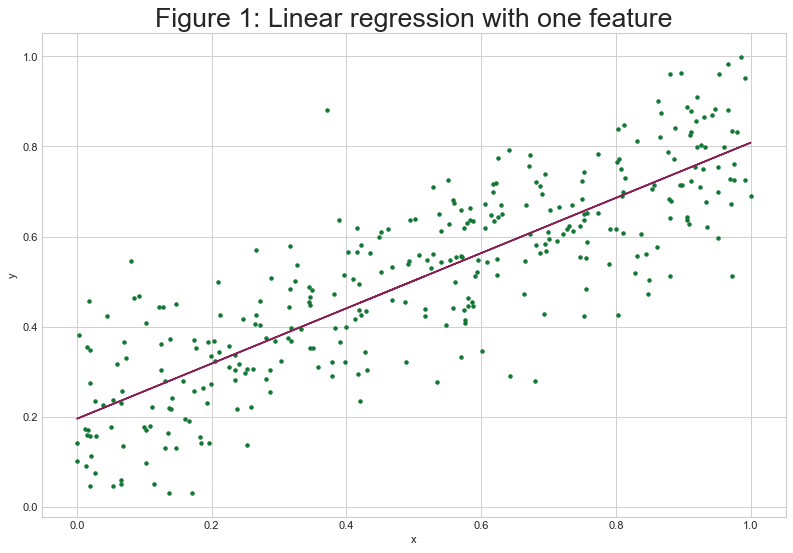

In [5]:
# plotting the given data:

plt.style.use('seaborn-whitegrid')

# Plotting function for model:
def f(x):
 return (w[0,0] + w[0,1]*x)
modelPoints = f(xarray)

fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

font = {
        'weight' : 'bold',
        'size'   : 8}

plt.xlabel('x')
plt.ylabel('y')

plt.title('Figure 1: Linear regression with one feature', size = 24)
plt.scatter(xarray, Y, marker='.',color='#117733')
plt.plot(xarray, modelPoints, color = "#882255")

plt.show()

# Results
The final hypothesis seems to be fitting the scatter plot well.

In [13]:
# Calc error for training-data 2D:
def calculateError(weights, X, Y):

    # Need to transpose the weights so that X can be multiplied with X.
    # X needs is a 325x3 matrix, whilst weights is a 3x1 matrix after it is transposed!
    weights = weights.T
    Xw = np.dot(X,weights)

    # Continue with the linear algebra to calculate the error:
    error = (1/len(Y)) * (np.linalg.norm(np.subtract(Xw,Y)))**2
    return error
errorForTrainingData2D = calculateError(w,X,Y)
print("errorForTrainingData2D", errorForTrainingData2D)


errorForTrainingData2D 22.088576098461303
